## This code is for the MUSE Cube data of IC219 to view a potential source's spectrum.

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
#import pyregion
import scipy
from scipy import ndimage
from scipy.ndimage import gaussian_filter1d

from astropy.utils import data
from astropy.io import fits
from astropy.io import ascii
from astropy.io.ascii.sextractor import SExtractor
#from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
#from spectral_cube import SpectralCube

from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa
from mpdaf.obj import Image, WCS
from mpdaf.obj import Spectrum, WaveCoord
from mpdaf.obj import iter_spe
from PyAstronomy import pyasl

### Open MUSE Cube:

In [2]:
cube = Cube(filename='IC219.fits')

### Input coordinates of potential cluster. 
<b><u>NOTE!!! cube axes are entered in as: [wavelength, y-value, x-value]

In [3]:
n = cube[:,143:163,285:305]

### Next use MPDAF's built-in function to compute the overall spectrum of the cube by taking the cube and summing along the X and Y axes of the image plane. This yields the total flux per spectral pixel.

In [4]:
sp = n.sum(axis=(1,2))

### Now to plot each spectrum. Absorption features (x1,x2,x3,x4) are indicated by a vertical dashed line. The dashed lines have been corrected for redshift (assuming redshift value of z=0.0168).

In [5]:
z=0.0168
x1=5263 # Mg
x2=5895 # Na
x3=6562 # H-alpha
x4=4861 # H-beta
SIIa=6717
SIIb=6731 
NIIa=6550
NIIb=6585

### The y-limits and y-value below may be changed depending on the amount of flux coming from the potential source. 

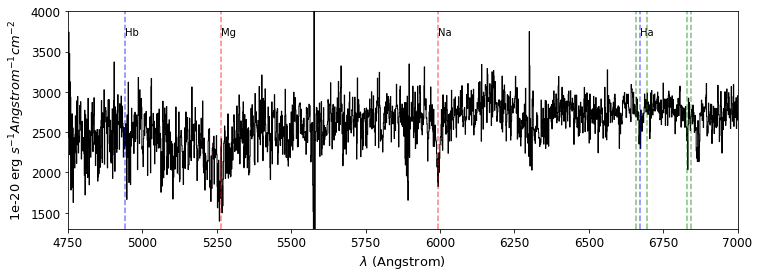

In [7]:
plt.figure(figsize=(12,4))
sp.plot(color='k')
plt.xlim(4750,7000)
plt.ylim(1300,4000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3700
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')
plt.axvline(SIIa+(SIIa*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(SIIa+(SIIa*z),y,s='SII')
plt.axvline(SIIb+(SIIb*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(SIIb+(SIIb*z),y+200,s='SII')
plt.axvline(NIIa+(NIIa*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(NIIa+(NIIa*z),y-200,s='NII')
plt.axvline(NIIb+(NIIb*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(NIIb+(NIIb*z),y+200,s='NII')